In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


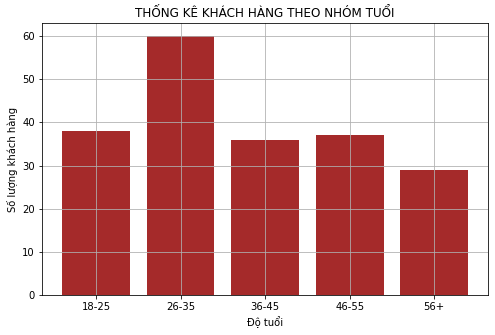

In [6]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","56+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(8,5))
plt.bar(x, y, color='brown')
plt.title("THỐNG KÊ KHÁCH HÀNG THEO NHÓM TUỔI")
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng khách hàng")
plt.grid(True)
plt.show()

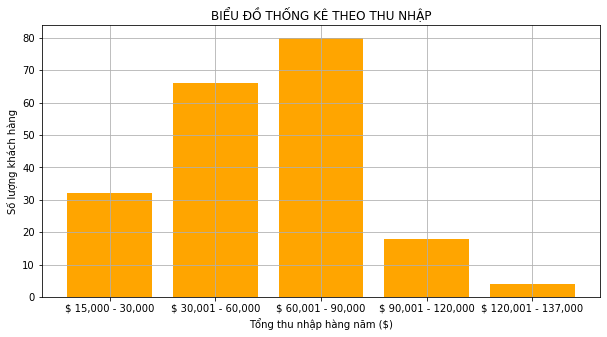

In [7]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 15) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 137)]

aix = ["$ 15,000 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 137,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(10,5))
plt.bar(aix, aiy, color='orange')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO THU NHẬP")
plt.xlabel("Tổng thu nhập hàng năm ($)")
plt.ylabel("Số lượng khách hàng")
plt.grid(True)
plt.show()

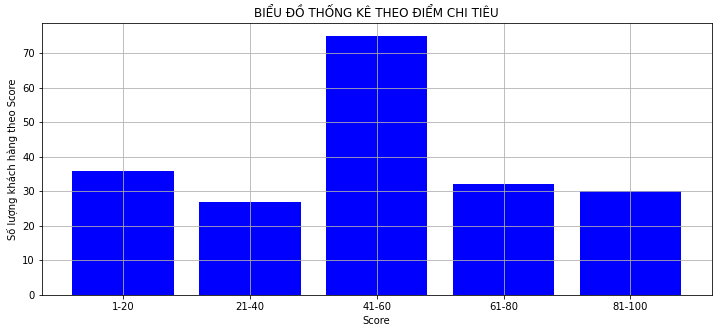

In [8]:
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(12,5))
plt.bar(ssx,ssy, color='blue')
plt.title("BIỂU ĐỒ THỐNG KÊ THEO ĐIỂM CHI TIÊU")
plt.xlabel("Score")
plt.ylabel("Số lượng khách hàng theo Score")
plt.grid(True)
plt.show()

Female    112
Male       88
Name: Gender, dtype: int64


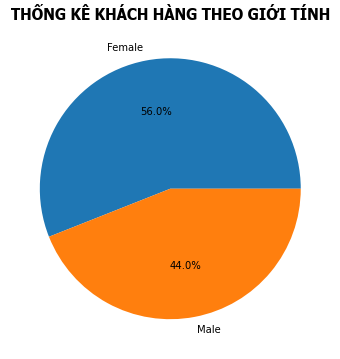

In [12]:
genders = df.Gender.value_counts()
print(genders)

plt.figure(figsize=(8,6))
plt.subplot()
plt.pie(genders.values,
        labels=genders.index,
        autopct='%1.1f%%') 
plt.title('THỐNG KÊ KHÁCH HÀNG THEO GIỚI TÍNH', fontdict={'fontname':'Tahoma',
                                                    'fontweight':'bold',
                                                   'fontsize':15})
plt.show()

In [13]:
data_cluster = df.iloc[:,2:]
data_cluster.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


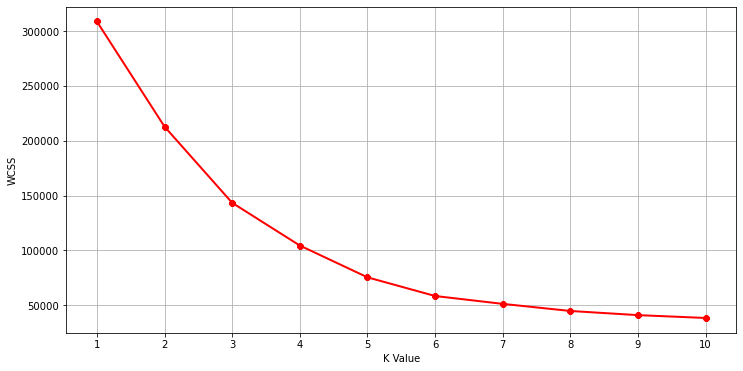

In [14]:
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 10
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [15]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 5 cụm, các tham số khác sử dụng mặc định
model_km = KMeans(n_clusters=5)

#Liệt kê các tham số của mô hình
model_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [16]:
model_km.fit_predict(df.iloc[:,2:])

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
df["Cluster"] = model_km.labels_
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


4    77
1    39
3    36
2    25
0    23
Name: Cluster, dtype: int64


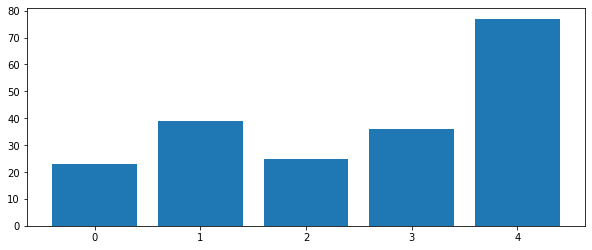

In [17]:
sum_cluster = df.Cluster.value_counts()
print(sum_cluster)

#Trực quan hóa dữ liệu
plt.figure(figsize=(10,4))
plt.bar(sum_cluster.index, sum_cluster.values)
plt.show()


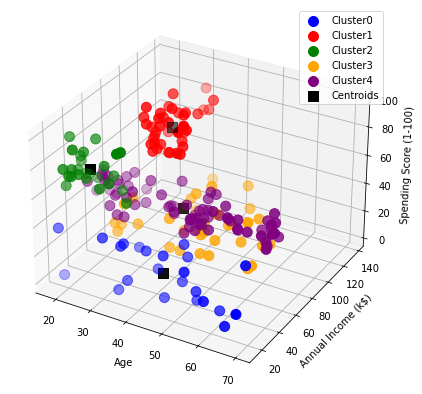

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.Cluster == 0], df["Annual Income (k$)"][df.Cluster == 0], df["Spending Score (1-100)"][df.Cluster == 0], c='blue', s=100,label='Cluster0')
ax.scatter(df.Age[df.Cluster == 1], df["Annual Income (k$)"][df.Cluster == 1], df["Spending Score (1-100)"][df.Cluster == 1], c='red', s=100,label='Cluster1')
ax.scatter(df.Age[df.Cluster == 2], df["Annual Income (k$)"][df.Cluster == 2], df["Spending Score (1-100)"][df.Cluster == 2], c='green', s=100,label='Cluster2')
ax.scatter(df.Age[df.Cluster == 3], df["Annual Income (k$)"][df.Cluster == 3], df["Spending Score (1-100)"][df.Cluster == 3], c='orange', s=100,label='Cluster3')
ax.scatter(df.Age[df.Cluster == 4], df["Annual Income (k$)"][df.Cluster == 4], df["Spending Score (1-100)"][df.Cluster == 4], c='purple', s=100,label='Cluster4')
ax.scatter(model_km.cluster_centers_[:, 0], 
           model_km.cluster_centers_[:, 1],
           model_km.cluster_centers_[:, 2], 
           color = 'black', label = 'Centroids',s=100,marker='s')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
#Vị trí tâm của các cụm
np.round(model_km.cluster_centers_,1)

array([[45.2, 26.3, 20.9],
       [32.7, 86.5, 82.1],
       [25. , 28. , 77. ],
       [40.7, 87.8, 17.6],
       [43.7, 55.5, 49.3]])

In [20]:
model_km.inertia_

75479.76429338777

In [21]:

#Danh sách khách hàng nhóm 0
cluster_0 = df[df.Cluster== 0]
cluster_0.reset_index(inplace=True)
cluster_0[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)', 'Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,3,Female,20,16,6,0
2,5,Female,31,17,40,0
3,7,Female,35,18,6,0
4,9,Male,64,19,3,0
5,11,Male,67,19,14,0
6,13,Female,58,20,15,0
7,15,Male,37,20,13,0
8,17,Female,35,21,35,0
9,19,Male,52,23,29,0


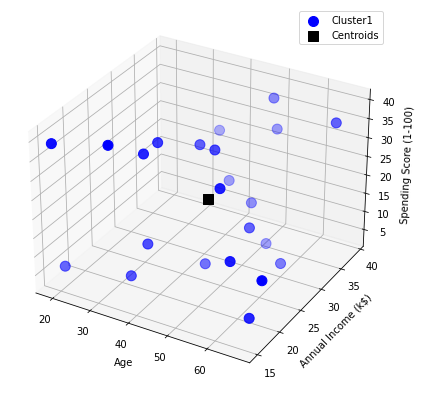

In [22]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_0['Age'], cluster_0["Annual Income (k$)"], cluster_0["Spending Score (1-100)"], c='blue', s=100,label='Cluster1')
ax.scatter(model_km.cluster_centers_[0, 0], model_km.cluster_centers_[0, 1],model_km.cluster_centers_[0, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [23]:
cluster_2 = df[df.Cluster== 2]
cluster_2.reset_index(inplace=True)
cluster_2[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,2,Male,21,15,81,2
1,4,Female,23,16,77,2
2,6,Female,22,17,76,2
3,8,Female,23,18,94,2
4,10,Female,30,19,72,2
5,12,Female,35,19,99,2
6,14,Female,24,20,77,2
7,16,Male,22,20,79,2
8,18,Male,20,21,66,2
9,20,Female,35,23,98,2


In [35]:
print(cluster_0[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   45.217391           26.304348               20.913043
std    13.228607            7.893811               13.017167
min    19.000000           15.000000                3.000000
25%    35.500000           19.500000                9.500000
50%    46.000000           25.000000               17.000000
75%    53.500000           33.000000               33.500000
max    67.000000           39.000000               40.000000


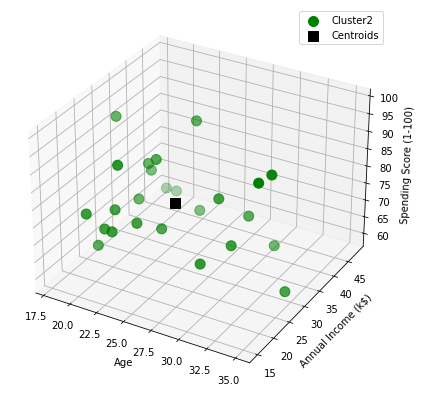

In [24]:
#Trực quan hóa nhóm 2
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_2["Age"], cluster_2["Annual Income (k$)"], cluster_2["Spending Score (1-100)"], c='green', s=100,label='Cluster2')
ax.scatter(model_km.cluster_centers_[2, 0], 
           model_km.cluster_centers_[2, 1],
           model_km.cluster_centers_[2, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [25]:
cluster_3 = df[df.Cluster== 3]
cluster_3.reset_index(inplace=True)
cluster_3[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,125,Female,23,70,29,3
1,129,Male,59,71,11,3
2,131,Male,47,71,9,3
3,133,Female,25,72,34,3
4,135,Male,20,73,5,3
5,137,Female,44,73,7,3
6,139,Male,19,74,10,3
7,141,Female,57,75,5,3
8,145,Male,25,77,12,3
9,147,Male,48,77,36,3


In [33]:
print(cluster_2[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  25.000000            25.00000               25.000000
mean   24.960000            28.04000               77.000000
std     5.412024             9.65436               11.803954
min    18.000000            15.00000               59.000000
25%    21.000000            20.00000               72.000000
50%    23.000000            28.00000               76.000000
75%    30.000000            34.00000               82.000000
max    35.000000            48.00000               99.000000


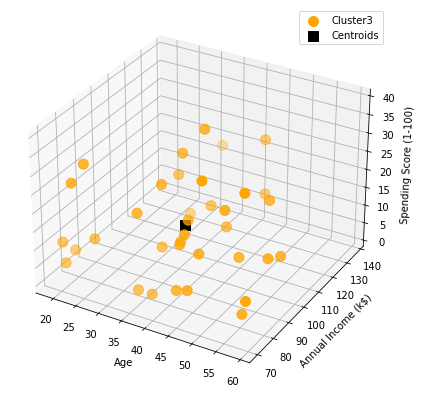

In [28]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_3['Age'], cluster_3["Annual Income (k$)"], cluster_3["Spending Score (1-100)"], c='orange', s=100,label='Cluster3')
ax.scatter(model_km.cluster_centers_[3, 0], model_km.cluster_centers_[3, 1],model_km.cluster_centers_[3, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [29]:
cluster_4 = df[df.Cluster== 4]
cluster_4.reset_index(inplace=True)
cluster_4[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)','Cluster']]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,47,Female,50,40,55,4
1,48,Female,27,40,47,4
2,49,Female,29,40,42,4
3,50,Female,31,40,42,4
4,51,Female,49,42,52,4
...,...,...,...,...,...,...
72,121,Male,27,67,56,4
73,122,Female,38,67,40,4
74,123,Female,40,69,58,4
75,127,Male,43,71,35,4


In [32]:
print(cluster_3[['Age','Annual Income (k$)','Spending Score (1-100)']].describe())

             Age  Annual Income (k$)  Spending Score (1-100)
count  36.000000           36.000000               36.000000
mean   40.666667           87.750000               17.583333
std    11.496583           16.387059               10.204691
min    19.000000           70.000000                1.000000
25%    34.000000           77.000000               10.000000
50%    41.500000           83.000000               16.000000
75%    47.250000           97.250000               24.500000
max    59.000000          137.000000               39.000000


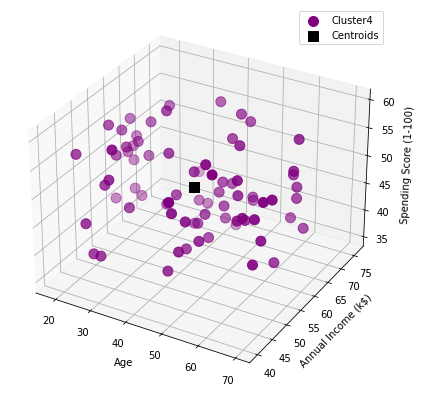

In [31]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_4['Age'], cluster_4["Annual Income (k$)"], cluster_4["Spending Score (1-100)"], c='purple', s=100,label='Cluster4')
ax.scatter(model_km.cluster_centers_[4, 0], model_km.cluster_centers_[4, 1],model_km.cluster_centers_[4, 2], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()